In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
from scipy import stats 
from sklearn.datasets.samples_generator import make_regression

In [2]:
%matplotlib inline

In [3]:
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = int((te - ts) * 1000)
        else:
            print('%r  %2.2f ms' % \
                  (method.__name__, (te - ts) * 1000))
        return result
    return timed

In [4]:
X, y = make_regression(n_samples = 10000, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2019)

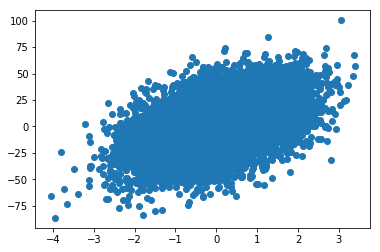

In [5]:
plt.scatter(X,y)

In [6]:
x = X.flatten()
slope, intercept,_,_,_ = stats.linregress(x,y)
print (slope)
print (intercept)

10.650659469662912
0.2873381752645907


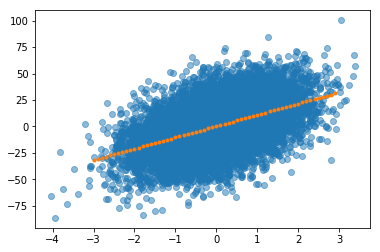

In [7]:
best_fit = np.vectorize(lambda x: x * slope + intercept)
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(-3,3,0.1)
plt.plot(grid,best_fit(grid), '.')

In [8]:
y = y.reshape(-1,1)

# Gradient Descent

## Cost Function & Gradients

<h4> The equation for calculating cost function and gradients are as shown below. Please note the cost function is for Linear regression. For other algorithms the cost function will be different and the gradients would have  to be derived from the cost functions



<b>Cost</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradients</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [9]:
def cal_cost(theta,X,y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [10]:
@timeit
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    for it in range(iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        theta_history[it, :] = theta.T
        cost_history[it] = cal_cost(theta, X, y)
    return theta, cost_history, theta_history

<h3> Let's start with 1000 iterations and a learning rate of 0.05. Start with theta from a Gaussian distribution

In [11]:
lr = 0.05
n_iter = 1000
theta = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
theta, cost_history, theta_history = gradient_descent(X_b, y, theta, lr, n_iter)
print("Theta0: {:0.3f},\nTheta1:{:0.3f}".format(theta[0][0], theta[1][0]))
print("Final cost/MSE:  {:0.3f}".format(cost_history[-1]))

'gradient_descent'  156.16 ms
Theta0: 0.287,
Theta1:10.651
Final cost/MSE:  19910372815.825


<h3> Let's plot the cost history over iterations

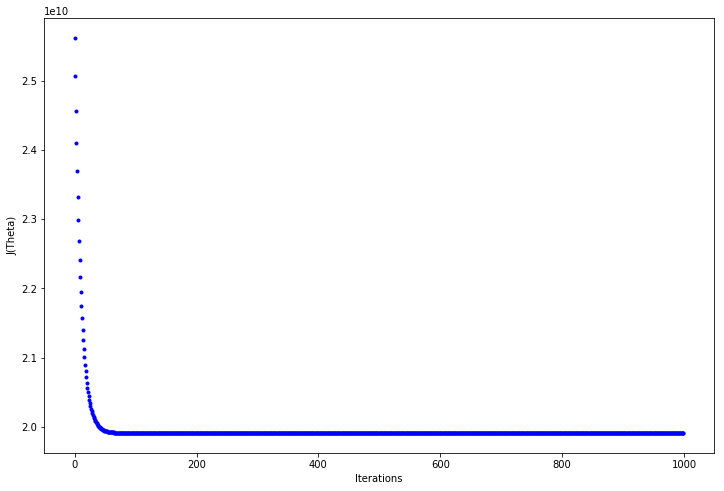

In [12]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

<h3> After around 60 iterations the cost is flat so the remaining iterations  are not needed or will not result in any further optimization. Let us zoom in till iteration 100 and see the curve

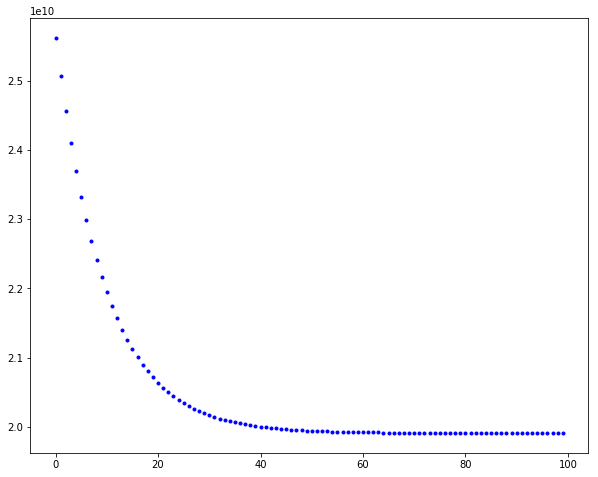

In [13]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(100),cost_history[:100],'b.')

# Stochastic Gradient Descent

In [14]:
@timeit
def stocashtic_gradient_descent(X, y, theta, learning_rate=0.01, iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i, theta)
            theta = theta - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta, X_i, y_i)
        cost_history[it] = cost
    return theta, cost_history

In [15]:
lr = 0.05
n_iter = 1000
theta = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)
print("Theta0: {:0.3f},\nTheta1:{:0.3f}".format(theta[0][0], theta[1][0]))
print("Final cost/MSE:  {:0.3f}".format(cost_history[-1]))

'stocashtic_gradient_descent'  193933.83 ms
Theta0: 0.321,
Theta1:10.681
Final cost/MSE:  2016254.635


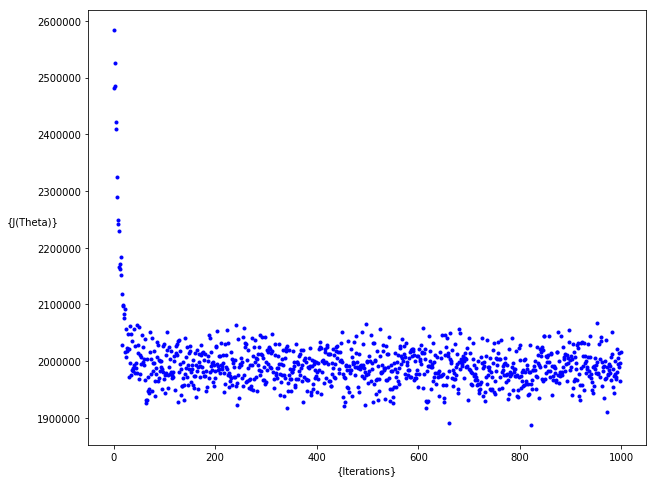

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_ylabel("{J(Theta)}", rotation=0)
ax.set_xlabel("{Iterations}")
theta = np.random.randn(2, 1)
_ = ax.plot(range(n_iter), cost_history, "b.")

# Mini Batch Gradient Descent

In [17]:
@timeit
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01, iterations=10, batch_size =20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            X_i = np.c_[np.ones(len(X_i)),X_i]
            prediction = np.dot(X_i,theta)
            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
    return theta, cost_history

In [18]:
lr = 0.05
n_iter = 1000
theta = np.random.randn(2, 1)
theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

'minibatch_gradient_descent'  24359.26 ms
Theta0:          0.288,
Theta1:          10.651
Final cost/MSE:  39820314.310


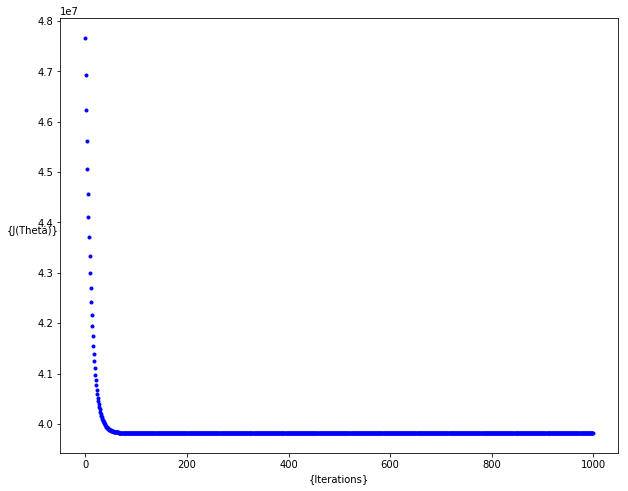

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_ylabel("{J(Theta)}", rotation=0)
ax.set_xlabel("{Iterations}")
theta = np.random.randn(2, 1)
_ = ax.plot(range(n_iter), cost_history, "b.")

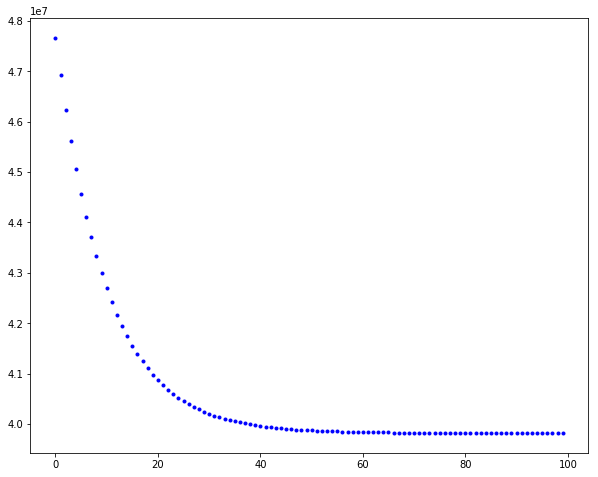

In [20]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(100),cost_history[:100],'b.')